In [57]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [58]:
import statsmodels.api as sm

In [59]:
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [60]:
from ISLP import load_data

In [61]:
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [62]:
import pandas as pd
studentPerf = pd.read_csv('Student_Performance.csv')
studentPerf


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [63]:
studentPerf.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [64]:
print(studentPerf.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
studentPerf

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [67]:
studentPerf['Extracurricular Activities'] = studentPerf['Extracurricular Activities'].apply(lambda x: 1 if x == 'Yes' else 0)
studentPerf



,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [69]:
studentPerf = studentPerf.dropna()

print(f"Number of rows after dropping NaN: {len(studentPerf)}")

Number of rows after dropping NaN: 10000


In [70]:
X = studentPerf[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
        'Sleep Hours', 'Sample Question Papers Practiced']]

In [71]:
y = studentPerf['Performance Index']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = model.predict(X_test)


In [75]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 4.082628398521855
R-squared: 0.9889832909573145


In [76]:
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coeffs)


                            Feature  Coefficient
0                     Hours Studied     2.852484
1                   Previous Scores     1.016988
2        Extracurricular Activities     0.608617
3                       Sleep Hours     0.476941
4  Sample Question Papers Practiced     0.191831


In [77]:
print(f"Intercept: {model.intercept_}")


Intercept: -33.92194621555611


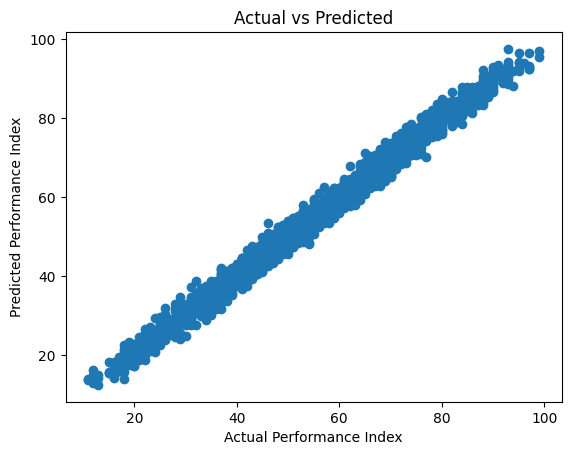

In [78]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted")
plt.show()
